In [1]:
import matplotlib.pyplot as plt
import numpy as np
import sys

sys.path.append('./../../code/')
from dn_utils.behavioral_models import (load_behavioral_data, 
    estimate_values_pd, estimate_pred_err)

In [75]:
def plot_pred_err(beh, meta, sub, con, pe_regressor) -> None:
    '''Plot prediction error time-course for single task.
    
    Args:
        beh (np.array): aggregated behavioral responses
        meta (dict): description of beh array coding
        subject (int): subject index
        condition (int): task condition index
        pe_regressor (np.arrary):
            trialwise prediction-error regressor
    '''
    fig, ax = plt.subplots(nrows=1, ncols=1, facecolor='w', figsize=(20, 3))
    
    block = beh[sub, con, :, meta['dim4'].index('block')]
    trials = np.arange(n_trials) + 1

    ax.plot(0)
    ax.plot(trials, pe_regressor, color='grey')
    ax.plot(
        trials[pe_regressor > 0], 
        pe_regressor[pe_regressor > 0],
        linewidth=0,
        marker='o',
        markersize=5,
        color='g',
    )
    ax.plot(
        trials[pe_regressor < 0], 
        pe_regressor[pe_regressor < 0],
        linewidth=0,
        marker='o',
        markersize=5,
        color='r',
    )
    ax.plot(
        trials[pe_regressor == 0],
        pe_regressor[pe_regressor == 0],
        linewidth=0,
        marker='o',
        markersize=5,
        color='orange',
    )

    ax.set_ylim([-1.1, 1.1])
    ax.set_xlim([0, n_trials + 1])
    ax.set_xticks(np.concatenate((np.nonzero(np.diff(block))[0] + 2, [1, 110])))
    ax.grid()

### Observation
Usually subjects are trying to minimize overal prediction error. Here it is not precisely the case, because sometimes subject pick probabilistically worse option to maximize their winnings.

In [2]:
# Load data
beh_path = '/home/kmb/Desktop/Neuroscience/Projects/BONNA_decide_net/' \
           'data/main_fmri_study/sourcedata/behavioral'
param_path = '/home/kmb/Desktop/Neuroscience/Projects/BONNA_decide_net/' \
             'code/behavioral_analysis/matjags-dn/data/alpha_pdci_mle.npy'

beh, meta = load_behavioral_data(beh_path)
alpha_pdci_mle = np.load(param_path)

n_subjects = len(meta['dim1'])
n_conditions = len(meta['dim2'])
n_trials = len(meta['dim3'])

Shape of beh array: (32, 2, 110, 21)
Conditions [(0, 'rew'), (1, 'pun')]
Columns: [(0, 'block'), (1, 'rwd'), (2, 'magn_left'), (3, 'magn_right'), (4, 'response'), (5, 'rt'), (6, 'won_bool'), (7, 'won_magn'), (8, 'acc_after_trial'), (9, 'onset_iti'), (10, 'onset_iti_plan'), (11, 'onset_iti_glob'), (12, 'onset_dec'), (13, 'onset_dec_plan'), (14, 'onset_dec_glob'), (15, 'onset_isi'), (16, 'onset_isi_plan'), (17, 'onset_isi_glob'), (18, 'onset_out'), (19, 'onset_out_plan'), (20, 'onset_out_glob')]


### Calculate and save PE regressors.

In [3]:
pe_regressors = np.zeros((n_subjects, n_conditions, n_trials))

for sub in range(n_subjects):
    
    for con in range(n_conditions):
        
        val = estimate_values_pd(
            beh, meta, sub, con,
            alpha_plus=alpha_pdci_mle[sub, 0], 
            alpha_minus=alpha_pdci_mle[sub, 1]
        )
        pe_regressors[sub, con, :] = estimate_pred_err(
            beh, meta, sub, con, val
        )
        
np.save('data/pe_regressors', pe_regressors)

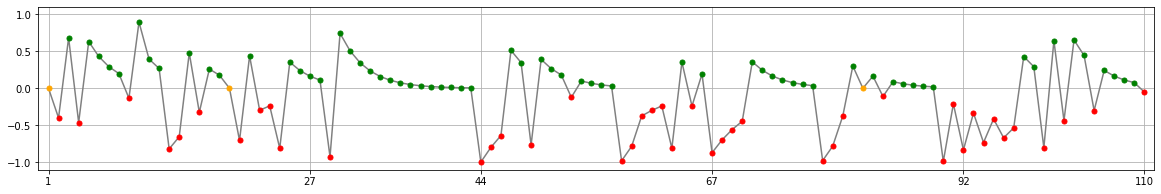

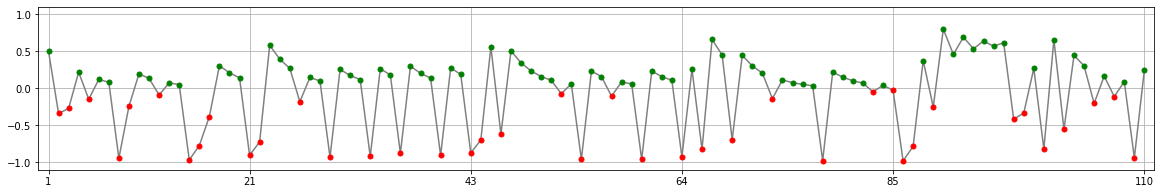

In [124]:
sub = 0
plot_pred_err(beh, meta, sub, 0, pe_regressors[sub, 0, :])
plot_pred_err(beh, meta, sub, 1, pe_regressors[sub, 1, :])